In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TBIP visualization

In [40]:
ideal_points = np.load("../data/output/uk19-step=10000/ideal_point_loc.npy")

with open("../tbip/data/uk-19/clean/author_map.txt",'r') as f:
    author_map=f.readlines()
author_map = np.array(author_map)

authors = pd.DataFrame({"name": author_map, "ideal_point" :  ideal_points})
authors['name'] = authors['name'].str.replace('\n', '')
authors[['name', 'party']] = authors['name'].str.split(' \(', n=1, expand=True)
authors.loc[:, 'party'] = authors['party'].str.rstrip(')')

In [41]:
def standardize(x):
    """Standardize a vector x."""
    return (x - np.mean(x)) / np.std(x)

In [42]:
authors['std_ideal_point'] = standardize(authors['ideal_point'])

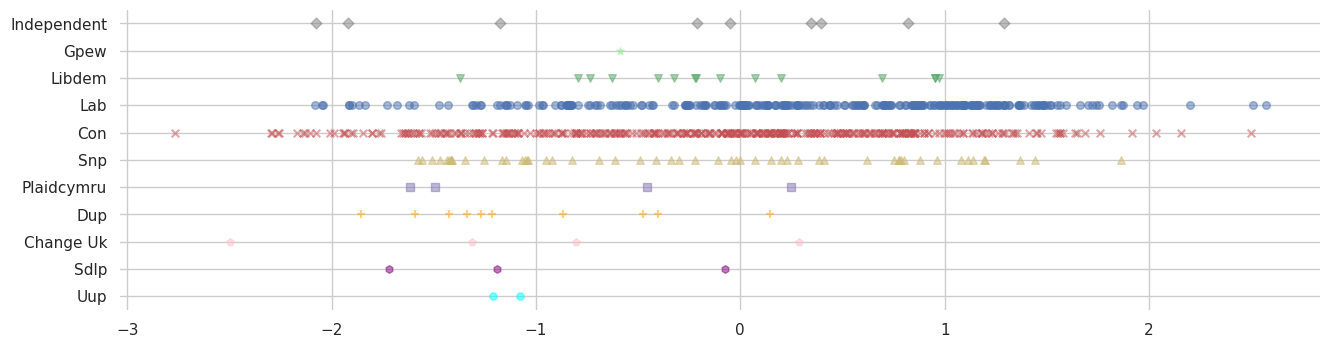

In [43]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 2))
ax = plt.axes([0, 0, 1, 1.5], frameon=False)

color_map = {
    "Con": "r", "Lab": "b", "Libdem": "g",
    "Snp": "y", "Plaidcymru": "m", "Gpew": "lightgreen",
    "Dup": "orange", "Independent": "gray", "Change Uk": "pink", "Sdlp": "purple", "Uup": "cyan"
}

marker_map = {
    "Con": "x", "Lab": "o", "Libdem": "v",
    "Snp": "^", "Plaidcymru": "s", "Gpew": "*",
    "Dup": "+", "Independent": "D", "Change Uk": "p", "Sdlp": "h", "Uup": "8"
}

y_map = {
    "Con": 0, "Lab": 0.02, "Libdem": 0.04,
    "Snp": -0.02, "Plaidcymru": -0.04, "Gpew": 0.06,
    "Dup": -0.06, "Independent": 0.08, "Change Uk": -0.08, "Sdlp": -0.1, "Uup": -0.12
}

speech_sizes = np.array([30] * len(authors.party))

speech_colors = np.array([color_map[p] for p in authors.party])
speech_markers = np.array([marker_map[p] for p in authors.party])
y = np.array([y_map[p] for p in authors.party])

for index in range(len(authors)):
    ax.scatter(authors.std_ideal_point[index], y[index],
               c=speech_colors[index], marker=speech_markers[index], s=speech_sizes[index], alpha=0.5)

ax.set_yticks(list(y_map.values()))
ax.set_yticklabels(list(y_map.keys()))
plt.show()

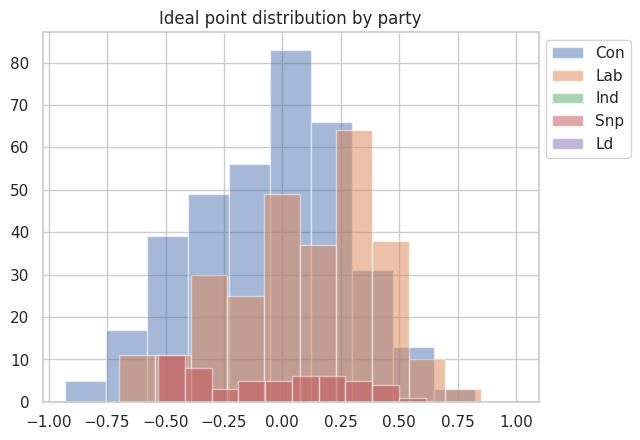

In [44]:
# plot distribution of main parties
main_parties = ['Con', 'Lab', 'Ind', 'Snp', 'Ld']

for i, party in enumerate(main_parties):
  plt.hist(authors[authors['party']==party]['ideal_point'], alpha=0.5, label=party)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Ideal point distribution by party')
plt.show()

In [45]:
# topics
import analysis_utils as utils


# Load TBIP data.
data_dir = '../data/prepro/uk-19'
(counts, vocabulary, author_indices, 
 author_map) = utils.load_text_data(data_dir)

# Load TBIP parameters.
param_dir = "../data/output/uk19-step=10000"
(document_loc, document_scale, objective_topic_loc, objective_topic_scale, 
 ideological_topic_loc, ideological_topic_scale, ideal_point_loc, 
 ideal_point_scale) = utils.load_tbip_parameters(param_dir)

# Print topics.
utils.print_topics(objective_topic_loc, 
                   objective_topic_scale,
                   ideological_topic_loc, 
                   ideological_topic_scale, 
                   vocabulary)


['Negative 0: eu, european union, immigration, home, country, issue, united kingdom, prime, rights, europe'
 'Neutral 0: home, country, immigration, refugees, children, eu, british, europe, refugee, migration'
 'Positive 0: home, country, vulnerable, immigration, children, refugees, detention, asylum, refugee, family'
 '=========='
 'Negative 1: parliament, exit, powers, law, clause, european union, withdrawal, eu, legislation, ministers'
 'Neutral 1: legislation, powers, law, act, clause, parliament, new clause, state, rights, place'
 'Positive 1: legislation, act, regulations, ensure, place, powers, law, local authorities, state, important'
 '=========='
 'Negative 2: broadband, united kingdom, point, state, deal, help, digital, european union, communications, mobile'
 'Neutral 2: autism, help, broadband, access, digital, constituency, mobile, autistic, coverage, constituents'
 'Positive 2: autism, autistic, help, access, constituency, broadband, diagnosis, digital, training, spectru

# Vote visualization

In [46]:
# read data
# from data/votes/input_2019
senator_map = np.loadtxt('../data/votes/input_2019/senator_map.txt', dtype=str, delimiter=',')
# from data/votes/output_2019
ideal_point_loc = np.load('../data/votes/output_2019/ideal_point_loc.npy')
polarity_loc = np.load('../data/votes/output_2019/polarity_loc.npy')
popularity_loc = np.load('../data/votes/output_2019/popularity_loc.npy')

In [47]:
# convert to df
df_ip = pd.DataFrame({'name': senator_map, 'ideal_point': ideal_point_loc})
df_ip[['name', 'party']] = df_ip['name'].str.split(' \(', n=1, expand=True)
df_ip.loc[:, 'party'] = df_ip['party'].str.rstrip(')')

In [48]:
df_ip.loc[df_ip['party']=='Ind', 'party'] = 'Independent'
df_ip.loc[df_ip['party']=='Ld', 'party'] = 'Libdem'
df_ip.loc[df_ip['party']=='Cuk', 'party'] = 'Change Uk'
df_ip.loc[df_ip['party']=='Pc', 'party'] = 'Plaidcymru'
df_ip.loc[df_ip['party']=='Green', 'party'] = 'Gpew'

In [49]:
main_parties = ['Con', 'Lab', 'Snp', 'Libdem', 'Change Uk', 'Plaidcymru', 'Gpew', 'Independent', 'Dup', 'Sdlp', 'Uup']
df_ip= df_ip[df_ip['party'].isin(main_parties)].reset_index()
df_ip['std_ideal_point'] = standardize(df_ip['ideal_point'])

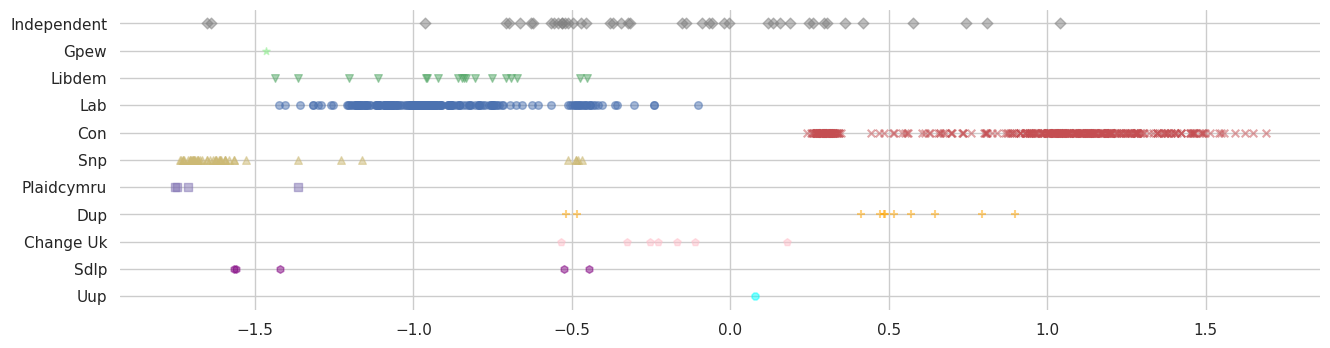

In [50]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 2))
ax = plt.axes([0, 0, 1, 1.5], frameon=False)

color_map = {
    "Con": "r", "Lab": "b", "Libdem": "g",
    "Snp": "y", "Plaidcymru": "m", "Gpew": "lightgreen",
    "Dup": "orange", "Independent": "gray", "Change Uk": "pink", "Sdlp": "purple", "Uup": "cyan"
}

marker_map = {
    "Con": "x", "Lab": "o", "Libdem": "v",
    "Snp": "^", "Plaidcymru": "s", "Gpew": "*",
    "Dup": "+", "Independent": "D", "Change Uk": "p", "Sdlp": "h", "Uup": "8"
}

y_map = {
    "Con": 0, "Lab": 0.02, "Libdem": 0.04,
    "Snp": -0.02, "Plaidcymru": -0.04, "Gpew": 0.06,
    "Dup": -0.06, "Independent": 0.08, "Change Uk": -0.08, "Sdlp": -0.1, "Uup": -0.12
}

speech_sizes = np.array([30] * len(authors.party))

speech_colors = np.array([color_map[p] for p in df_ip.party])
speech_markers = np.array([marker_map[p] for p in df_ip.party])
y = np.array([y_map[p] for p in df_ip.party])

for index in range(len(authors)):
    ax.scatter(df_ip.std_ideal_point[index], y[index],
               c=speech_colors[index], marker=speech_markers[index], s=speech_sizes[index], alpha=0.5)
ax.set_yticks(list(y_map.values()))
ax.set_yticklabels(list(y_map.keys()))
plt.show()

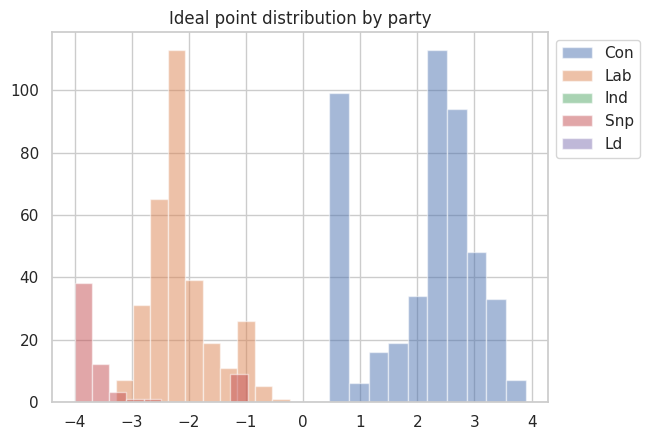

In [51]:
# plot distribution of main parties
main_parties = ['Con', 'Lab', 'Ind', 'Snp', 'Ld']

for i, party in enumerate(main_parties):
  plt.hist(df_ip[df_ip['party']==party]['ideal_point'], alpha=0.5, label=party)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Ideal point distribution by party')
plt.show()